In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

pd.options.display.max_rows = 100

In [46]:
def load_original_data():
    file=pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv', index_col=0)
    return file

In [47]:
ica_df=load_original_data()

In [48]:
ica_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [49]:
## Selecting the numerical variables
numericals= ica_df._get_numeric_data()
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [50]:
## Selecting the categorical variables
categoricals= ica_df.select_dtypes('object')
categoricals

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [51]:
## One Hot encoding of categorical variables
categoricals=pd.get_dummies(categoricals, drop_first=True)
categoricals

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [52]:
ica_new=pd.concat([numericals, categoricals], axis=1)
ica_new

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,1,0,0,0,0,0,1,0,1,0


In [54]:
#Removing outliers this formula does not work
#Q1 = ica_new.quantile(0.25)
#Q3 = ica_new.quantile(0.75)
#IQR = Q3 - Q1
#ica_new = ica_new[~((ica_new < (Q1 - 1.5 * IQR)) |(ica_new > (Q3 + 1.5 * IQR))).any(axis=1)]
#ica_new

In [55]:
## xy split
x=ica_new.drop('total_claim_amount', axis=1)
y=ica_new.total_claim_amount

In [56]:
x

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,0,0,1,...,1,0,0,0,0,0,1,0,1,0


In [57]:
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

In [58]:
## checking for multicollinearity
corr_matrix=x.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

[]

In [59]:
## seperating the data into train and test for both a and y variables
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=100)

In [60]:
##. finding the parameters ( mean, variance from the training set )
std_scaler=StandardScaler().fit(x_train)

x_train_scaled=std_scaler.transform(x_train)

In [61]:
## checking shape of training sample
x_train.shape

(7482, 108)

In [62]:
x_test_scaled=std_scaler.transform(x_test)

In [63]:
print(x_train_scaled)
print("--------")
print(x_test_scaled)

[[-0.30279362  1.38420579 -0.55997483 ... -0.50513219  0.6401844
  -0.47598044]
 [-0.8099625  -1.18180159 -0.82461546 ... -0.50513219  0.6401844
  -0.47598044]
 [-0.39119788  1.92167435 -0.58937935 ... -0.50513219 -1.56204994
  -0.47598044]
 ...
 [-0.15299751 -1.43974961 -0.94223352 ...  1.97967981  0.6401844
  -0.47598044]
 [ 0.10311483  1.49724099  0.52799221 ... -0.50513219 -1.56204994
  -0.47598044]
 [-0.55009442  0.16154903 -0.85401998 ... -0.50513219 -1.56204994
  -0.47598044]]
--------
[[-0.76763824  0.33296637 -0.76580643 ... -0.50513219  0.6401844
  -0.47598044]
 [ 0.37901701  1.56853457  1.2925096  ... -0.50513219  0.6401844
  -0.47598044]
 [ 0.18126304  1.02862006  0.99846445 ... -0.50513219 -1.56204994
   2.10092668]
 ...
 [ 0.82797197 -1.42647729  2.58630824 ... -0.50513219  0.6401844
  -0.47598044]
 [-0.43626672  1.38532852 -0.91282901 ... -0.50513219  0.6401844
  -0.47598044]
 [-0.18665469 -0.2752745  -0.2953342  ... -0.50513219  0.6401844
  -0.47598044]]


In [64]:
## Applying Linear regression
x.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'region_east',
       'region_north west', 'region_west region',
       ...
       'sales_channel_branch', 'sales_channel_call center',
       'sales_channel_web', 'vehicle_class_luxury car',
       'vehicle_class_luxury suv', 'vehicle_class_sports car',
       'vehicle_class_suv', 'vehicle_class_two-door car',
       'vehicle_size_medsize', 'vehicle_size_small'],
      dtype='object', length=108)

In [82]:
['cons'] + list(x.columns)

['1',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'region_east',
 'region_north west',
 'region_west region',
 'response_yes',
 'coverage_extended',
 'coverage_premium',
 'education_college',
 'education_doctor',
 'education_high school or below',
 'education_master',
 'effective_to_date_1/10/11',
 'effective_to_date_1/11/11',
 'effective_to_date_1/12/11',
 'effective_to_date_1/13/11',
 'effective_to_date_1/14/11',
 'effective_to_date_1/15/11',
 'effective_to_date_1/16/11',
 'effective_to_date_1/17/11',
 'effective_to_date_1/18/11',
 'effective_to_date_1/19/11',
 'effective_to_date_1/2/11',
 'effective_to_date_1/20/11',
 'effective_to_date_1/21/11',
 'effective_to_date_1/22/11',
 'effective_to_date_1/23/11',
 'effective_to_date_1/24/11',
 'effective_to_date_1/25/11',
 'effective_to_date_1/26/11',
 'effective_to_date_1/27/11',
 'effective_to_date_1/28/1

In [84]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary(xname=['const'] + list(x.columns))
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     238.5
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:55:15   Log-Likelihood:                -47555.
No. Observations:                7482   AIC:                         9.532e+04
Df Residuals:                    7376   BIC:                         9.606e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
cons      

In [66]:
predictions_test

array([196.8879229 , 529.29920813, 349.32697344, ..., 943.71548027,
       -60.1382008 ,  80.53288187])

In [67]:
model=LinearRegression()    # model
model.fit(x_train_scaled, y_train)   # model train

LinearRegression()

In [68]:
model.coef_

array([ 5.56697654e-01, -6.00671027e+00,  1.78795556e+02,  3.91513653e+00,
       -2.80896248e-01, -2.63598975e+00,  3.16091100e+00,  2.06735787e+00,
       -1.72062734e+00,  2.32796972e+00, -6.45018499e+00, -4.93091358e+00,
       -3.69266400e+00, -4.03508282e+00, -1.98091719e+00,  4.25512210e+00,
       -3.30384477e+00, -8.24361474e-01, -1.76734786e+00, -3.40785142e-01,
        2.31476756e+00, -1.00158266e+00,  6.13803521e-01, -2.34830319e+00,
       -1.88143766e+00, -7.57926351e-01, -1.46193795e+00,  9.39710030e-01,
        1.90203763e+00, -6.58067461e-01,  1.02938304e+00, -2.46785216e+00,
       -3.70069304e+00,  5.75065653e-01,  2.62862928e+00,  2.74342614e+00,
       -8.71537649e-02,  1.91110033e+00,  9.48707263e-01, -2.56514064e+00,
       -2.04867241e+00, -1.73265939e+00, -2.88817055e-01,  1.03392713e+00,
       -1.31764161e+00, -4.17965175e-01, -3.06806729e+00,  6.32272639e+12,
        6.22562038e+12,  6.41825836e+12,  6.32272639e+12,  6.12686547e+12,
        6.71867046e+12,  

In [69]:
model.intercept_

434.8662381413398

In [70]:
y_pred=model.predict(x_test_scaled)   # model prediction

y_pred_train=model.predict(x_train_scaled)

In [71]:
#Evaluating the model
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
9700,320,197.060327
4662,459,529.170853
1401,22,349.226657
6313,111,84.273094
8906,1000,797.319752
...,...,...
2913,446,518.718473
8340,452,559.034310
5910,1261,943.846931
3016,80,-60.255238


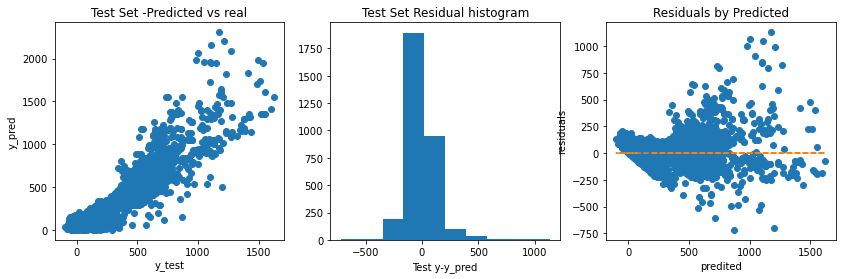

In [72]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [73]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

19549.401114722325
95.63470262222117


In [74]:
##prediction on the train set
mse(y_train,y_pred_train)

19420.76849119098

In [85]:
R2=r2_score(y_test,y_pred)
R2

0.7730049672908389

In [92]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

AttributeError: 'OLSResults' object has no attribute 'coef_'